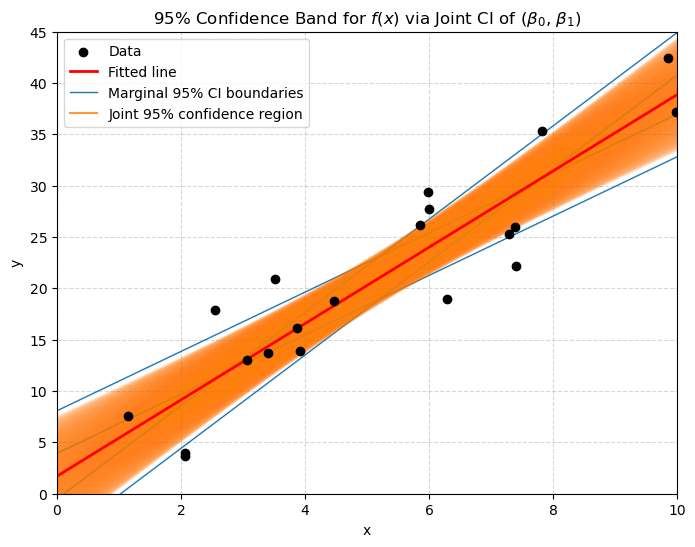

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

x = np.array([9.86, 7.29, 3.87, 9.99, 3.06, 7.82, 5.98, 4.47, 7.38, 1.14,
              3.92, 3.41, 5.86, 3.52, 6.00, 2.06, 6.29, 2.06, 7.40, 2.54])
y = np.array([42.40, 25.32, 16.10, 37.22, 13.06, 35.36, 29.34, 18.79, 25.98, 7.59,
              13.89, 13.67, 26.13, 20.87, 27.76, 3.66, 19.01, 4.00, 22.22, 17.93])

n = len(x)
meanx = np.mean(x)
meany = np.mean(y)
Sxx = np.sum((x - meanx)**2)

#计算beta0, beta1
beta0 = meany
beta1 = np.sum((x - meanx) * y) / Sxx

# 残差与 sigma 估计
residuals = y - (beta0 + beta1 * (x - meanx))
sigma_hat = np.sqrt(np.sum(residuals**2) / (n - 2))

# 标准误
std_beta0 = sigma_hat / np.sqrt(n)
std_beta1 = sigma_hat / np.sqrt(Sxx)


alpha = 0.05
a = (2 * (n - 1) / n) * stats.f.ppf(1 - alpha, dfn=2, dfd=n - 2)
nsigma = stats.t.ppf(0.975, df=n - 2)

fig = plt.figure(figsize=(8, 6))

# 绘制边际置信区间
for j in (beta0 - nsigma * std_beta0, beta0 + nsigma * std_beta0):
    for i in (beta1 - nsigma * std_beta1, beta1 + nsigma * std_beta1):
        b0j = j - i * meanx 
        plt.plot([0, 10], [b0j + i * 0, b0j + i * 10], color='C0', linewidth=1)

# 绘制联合置信区间
for j in np.linspace(beta0 - 3*std_beta0, beta0 + 3*std_beta0, 50):
    for i in np.linspace(beta1 - 3*std_beta1, beta1 + 3*std_beta1, 50):
        # 判断是否在联合 95% 置信区间内
        if ((j - beta0) / std_beta0)**2 + ((i - beta1) / std_beta1)**2 < a:
            b0j = j - i * meanx
            plt.plot([0, 10], [b0j + i*0, b0j + i*10], color='C1', alpha=0.05)

plt.scatter(x, y, color='black', zorder=5, label='Data')

b0_center = beta0 - beta1 * meanx
plt.plot([0, 10], [b0_center, b0_center + beta1 * 10], 
         color='red', linewidth=2, label='Fitted line')

plt.plot([], [], color='C0', linewidth=1, label='Marginal 95% CI boundaries')
plt.plot([], [], color='C1', alpha=0.8, label='Joint 95% confidence region')

plt.xlim(0, 10)
plt.ylim(0, 45)
plt.xlabel('x')
plt.ylabel('y')
plt.title('95% Confidence Band for $f(x)$ via Joint CI of ($\\beta_0$, $\\beta_1$)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

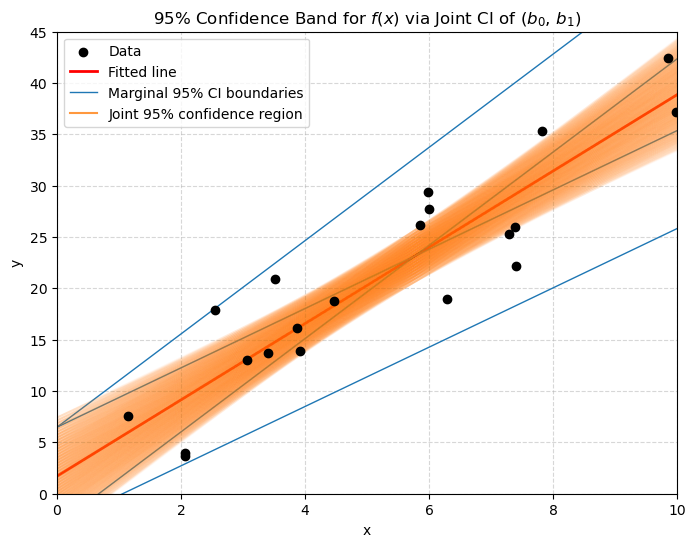

In [17]:
# 计算 b0, b1
b1 = np.sum((x - meanx) * y) / Sxx
b0 = meany - b1 * meanx

var_b1 = sigma_hat**2 / Sxx
var_b0 = sigma_hat**2 * (1/n + meanx**2 / Sxx)
std_b0 = np.sqrt(var_b0)
std_b1 = np.sqrt(var_b1)
cov_b0_b1 = -sigma_hat**2 * meanx / Sxx

# 构建协方差矩阵
cov_matrix = np.array([[var_b0, cov_b0_b1], [cov_b0_b1, var_b1]])

# 逆矩阵
inv_cov_matrix = np.linalg.inv(cov_matrix)

# F分布的临界值
c = (2 * (n - 1) / n) * stats.f.ppf(1 - alpha, dfn=2, dfd=n-2)

fig = plt.figure(figsize=(8, 6))

plt.scatter(x, y, color='black', zorder=5, label='Data')

plt.plot([0, 10], [b0 + b1*0, b0 + b1*10], color='red', linewidth=2, label='Fitted line')

# 绘制边际置信区间
nsigma = stats.t.ppf(0.975, df=n - 2)
for j in (b0 - nsigma * std_b0, b0 + nsigma * std_b0): 
    for i in (b1 - nsigma * std_b1, b1 + nsigma * std_b1): 
        plt.plot([0, 10], [j + i*0, j + i*10], color='C0', linewidth=1) 

# 绘制联合置信区间
for j in np.linspace(b0 - 3*np.sqrt(var_b0), b0 + 3*np.sqrt(var_b0), 50):
    for i in np.linspace(b1 - 3*np.sqrt(var_b1), b1 + 3*np.sqrt(var_b1), 50):
        delta = np.array([j - b0, i - b1])
        if np.dot(np.dot(delta, inv_cov_matrix), delta) <= c:
            plt.plot([0, 10], [j + i*0, j + i*10], color='C1', alpha=0.05)

plt.plot([], [], color='C0', linewidth=1, label='Marginal 95% CI boundaries')
plt.plot([], [], color='C1', alpha=0.8, label='Joint 95% confidence region')

plt.xlim(0, 10)
plt.ylim(0, 45)
plt.xlabel('x')
plt.ylabel('y')
plt.title('95% Confidence Band for $f(x)$ via Joint CI of ($b_0$, $b_1$)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()